<a href="https://colab.research.google.com/github/SurajKariyavar/Airline-Sentiment-Analysis/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requered Libraries for Natural Language Processing

In [1]:
import pandas as pd
import numpy as np
import spacy
import itertools
from spacy.lang.en.stop_words import STOP_WORDS
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Importing Data From local Machine (Coumputer)

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Airline_Tweets.csv to Airline_Tweets.csv


Contraction Dictionery

In [3]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


Reading CSV file and Removing Not requered Columns from CSV file

In [4]:
df=pd.read_csv('Airline_Tweets.csv')
df=df.drop(labels=['tweet_id','airline_sentiment_confidence' ,'negativereason_confidence', 'airline_sentiment_gold','name', 'negativereason_gold','tweet_coord', 'tweet_created','tweet_location', 'user_timezone'],axis=1)
df=df.drop(labels=['negativereason','airline','retweet_count'],axis=1)
df.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


Taking some sample data from dataset particularly Negative,Neutral,Positive and appending in One Variable

In [5]:
df1=df[df['airline_sentiment']=='negative'].sample(2500)
df2=df[df['airline_sentiment']=='neutral'].sample(2500)
df3=df[df['airline_sentiment']=='positive'].sample(2300)
df4=df1.append(df2)
df=df4.append(df3)
df.head()

,airline_sentiment,text
2367,negative,@united And then when we asked the stewardess ...
12828,negative,"@AmericanAir every time I try to call, it tell..."
4240,negative,@united 1 refused boarding with Nexus. nexus c...
9312,negative,@USAirways your airway is a joke. I have never...
12696,negative,@AmericanAir we have posted your response on f...


**DATA PREPROCESSING**

Contraction to Expansion Text from Dataset (ex : arn't == are not)

In [6]:
def cont_to_ex(x):
  if type(x) is str:
    for i in contractions:
      value=contractions[i]
      x=x.replace(i,value)
    return x
  else:
    return x


df['text']=df['text'].apply(lambda x: cont_to_ex(x))
df.head()

,airline_sentiment,text
2367,negative,@united And then when we asked the stewardess ...
12828,negative,"@AmericanAir every time I try to call, it tell..."
4240,negative,@united 1 refused boarding with Nexus. nexus c...
9312,negative,@USAirways your airway is a joke. I have never...
12696,negative,@AmericanAir we have posted your response on f...


Removing Emojis from Dataset

In [7]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


df['text']=df['text'].apply(lambda x: remove_emoji(x))
df.head()

,airline_sentiment,text
2367,negative,@united And then when we asked the stewardess ...
12828,negative,"@AmericanAir every time I try to call, it tell..."
4240,negative,@united 1 refused boarding with Nexus. nexus c...
9312,negative,@USAirways your airway is a joke. I have never...
12696,negative,@AmericanAir we have posted your response on f...


removing Panctuation from data set and Digits

> Indented block



In [8]:
df['text']=df['text'].apply(lambda x:re.sub("([a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+)",'' , x) )
df['text']=df['text'].apply(lambda x: re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]','',x))
df['text']=df['text'].apply(lambda x: re.sub("\d+", "", x))
df['text']=df['text'].apply(lambda x: re.sub('@','',x))
df['text']=df['text'].apply(lambda x:re.sub('#','',x))
df.head()

,airline_sentiment,text
2367,negative,united And then when we asked the stewardess t...
12828,negative,"AmericanAir every time I try to call, it tells..."
4240,negative,united refused boarding with Nexus. nexus con...
9312,negative,USAirways your airway is a joke. I have never ...
12696,negative,AmericanAir we have posted your response on fa...


All letters making small charecters  

In [9]:
df['text']=df['text'].apply(lambda x: x.lower())
df.head()

,airline_sentiment,text
2367,negative,united and then when we asked the stewardess t...
12828,negative,"americanair every time i try to call, it tells..."
4240,negative,united refused boarding with nexus. nexus con...
9312,negative,usairways your airway is a joke. i have never ...
12696,negative,americanair we have posted your response on fa...


Removing STOP_WORDS like (ex : is,are,these)

In [10]:
df['text']=df['text'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS])) 
df.head()

,airline_sentiment,text
2367,negative,united asked stewardess disinfectant wipe tras...
12828,negative,"americanair time try call, tells try late flig..."
4240,negative,united refused boarding nexus. nexus confirmed...
9312,negative,usairways airway joke. dealt worse service
12696,negative,americanair posted response facebook people ap...


Removing HYPER_LINKS like ( http:// )

In [11]:
df['text']=df['text'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''',' ', x))
df.head()

,airline_sentiment,text
2367,negative,united asked stewardess disinfectant wipe tras...
12828,negative,"americanair time try call, tells try late flig..."
4240,negative,united refused boarding nexus. nexus confirmed...
9312,negative,usairways airway joke. dealt worse service
12696,negative,americanair posted response facebook people ap...


Label Encoding (Negative : 0 ,Neutral:1 , Positive:2)

In [12]:
label_encoder = preprocessing.LabelEncoder()
df['airline_sentiment']=label_encoder.fit_transform(df['airline_sentiment'])
df.head()

,airline_sentiment,text
2367,0,united asked stewardess disinfectant wipe tras...
12828,0,"americanair time try call, tells try late flig..."
4240,0,united refused boarding nexus. nexus confirmed...
9312,0,usairways airway joke. dealt worse service
12696,0,americanair posted response facebook people ap...


Seperating Target and Independent data (Target=airline sentiment, Independent= text )  

In [13]:
y=df['airline_sentiment']
x=df['text']

Spliting data for train and test

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0,)

Intializing RnadomForest object

In [15]:
rf=RandomForestClassifier(random_state=43,n_jobs=-1,n_estimators=200)

Term Frequency and Invers Document Frequency

In [16]:
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
counts = vectorizer.fit_transform(x_train)
vocab = vectorizer.vocabulary_

Fitting The Model

In [17]:
model = rf.fit(counts, y_train)

Making Prediction

In [18]:
example_counts = vectorizer.transform(x_test)
predictions = model.predict(example_counts)
print(predictions)

[1 0 0 ... 2 2 1]


Finding Accuracy Score,How Best our works or predicts the given data 

In [19]:
score=accuracy_score(y_test,predictions)
print(score)

0.7027397260273973


In [ ]:
Recall and Precision of Confusion metrics

In [20]:
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None)
capture = recall_score(y_test, predictions, average=None)

print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.70
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       489
           1       0.62      0.76      0.68       519
           2       0.77      0.72      0.75       452

    accuracy                           0.70      1460
   macro avg       0.72      0.70      0.71      1460
weighted avg       0.72      0.70      0.70      1460



Plotting the Confusion Metrix 

In [21]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(150,100))

,Category,Index
0,bad cmt,1
1,better cmt,2
2,best cmt,3


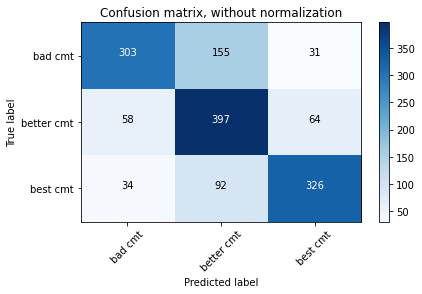

<Figure size 10800x7200 with 0 Axes>

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

class_names =['bad cmt','better cmt','best cmt']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

classInfo = pd.DataFrame(data=[])
for i in range(0,len(class_names)):
    classInfo = classInfo.append([[class_names[i],i+1]],ignore_index=True)

classInfo.columns=['Category','Index']
classInfo